# IMPIMENTING TENSORFLOW 
Use Case: 
Building Neural Network to identify the hand written digits using MNIST Database using SOFTMAX Activation Function. 

* Importing all necessary modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D,Dense, Flatten, Dropout
import tensorflow as tf

In [2]:
# Importing MNIST Dataset 
from tensorflow.keras.datasets import  mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

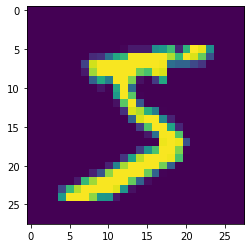

In [3]:
# Visualizing Mnist Dataset
plt.imshow(x_train[0])

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
y_train.shape

(60000,)

In [6]:
x_test.shape

(10000, 28, 28)

In [7]:
y_test.shape

(10000,)

In [8]:
x_train[0].max()
# As we can Clearly see that output is quite hugh as we compared it to 1. 

255

In [9]:
# So we are going to trim that number between 0 and 1
x_train = x_train/255.0
x_test= x_test/255.0
x_train[0].max()

1.0

In [10]:
# Reshaping each andevery image from (28,28) -2D into (28,28,1)-3D 
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)
# Checking the shape again 
x_train[0].shape

(28, 28, 1)

In [11]:
# Building our Neural Network to work with 
input_shape = x_train[0].shape

In [12]:
# Adding 2 layers of Convolution Neural Network
model = Sequential()
model.add(Conv2D(filters= 32, kernel_size=(3,3), activation= 'relu',input_shape = input_shape))
model.add(Conv2D(filters= 64, kernel_size=(3,3), activation= 'relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.25))

# Converting 2D data into a VECTOR
model.add(Flatten())
model.add(Dense(128, activation= 'relu')) # "RELU" is most widely used activation function
model.add(Dropout(0.50))

# Adding Final Output layer
model.add(Dense(10, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                        

In [13]:
# Compiling the while model
model.compile(loss= "sparse_categorical_crossentropy", optimizer='adam', metrics=['accuracy'])

# TRAINING THE MODEL

In [14]:
train = model.fit(x_train,y_train, batch_size= 128, epochs= 10, verbose=1, validation_data= (x_test,y_test))

Epoch 1/10
469/469 [==============================] - 101s 213ms/step - loss: 0.2486 - accuracy: 0.9246 - val_loss: 0.0493 - val_accuracy: 0.9850
Epoch 2/10
244/469 [==============>...............] - ETA: 48s - loss: 0.0927 - accuracy: 0.9718

In [15]:
# Evaluating the Model.. 
model.evaluate(x_test,y_test)

313/313 [==============================] - 4s 12ms/step - loss: 0.0455 - accuracy: 0.9855


[0.0454939566552639, 0.9854999780654907]

In [16]:
model.predict(x= x_test)

array([[2.0772900e-08, 1.8356363e-09, 6.7614133e-07, ..., 9.9999106e-01,
        6.6962023e-09, 3.1045336e-06],
       [7.1665170e-07, 5.4238648e-05, 9.9991798e-01, ..., 3.9729474e-07,
        1.9728795e-05, 5.7038368e-10],
       [5.2808394e-07, 9.9956077e-01, 3.7547641e-05, ..., 7.3139396e-05,
        6.7285735e-05, 5.1919988e-06],
       ...,
       [1.1719149e-09, 1.9955078e-08, 8.0364035e-09, ..., 3.9677369e-07,
        4.9990786e-06, 1.1840528e-04],
       [1.6700395e-07, 1.6736442e-07, 5.3335145e-09, ..., 4.9752718e-09,
        3.8661182e-04, 3.9093686e-07],
       [1.4497748e-06, 3.5748410e-08, 9.6783822e-07, ..., 1.5116733e-10,
        3.7370609e-07, 1.5157717e-08]], dtype=float32)

# WITH THIS TRAINNG MODEL, 
We are able to achieve The accuracy of  over 99%. 

And Loss of 0.027. 

# DRAWING THE LEARNING CURVE FOR THE MODEL

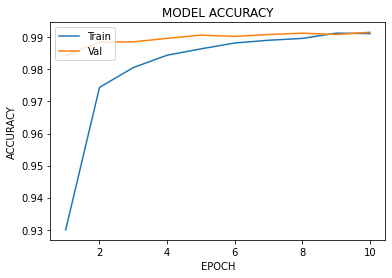

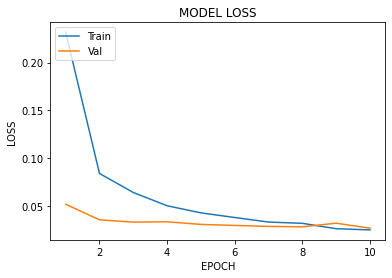

In [ ]:
def plot_learning_curvee(train, epochs =10):      # default value for epoch is 10
    # Plot training and Validation accuracy values

    epoch_range = range(1, epochs +1)
    plt.plot(epoch_range, train.history['accuracy'])
    plt.plot(epoch_range, train.history['val_accuracy'])
    plt.title("MODEL ACCURACY")
    plt.xlabel("EPOCH")
    plt.ylabel("ACCURACY")
    plt.legend(['Train', 'Val'], loc = 'upper left')
    plt.show()

    # Plot training and Validation Loss values
    epoch_range = range(1, epochs +1)
    plt.plot(epoch_range, train.history['loss'])
    plt.plot(epoch_range, train.history['val_loss'])
    plt.title("MODEL LOSS")
    plt.xlabel("EPOCH")
    plt.ylabel("LOSS")
    plt.legend(['Train', 'Val'], loc = 'upper left')
    plt.show()


plot_learning_curvee (train,10)

In [ ]:
train.history

{'loss': [0.23164041340351105,
  0.08429379761219025,
  0.06443624198436737,
  0.05060657486319542,
  0.043182842433452606,
  0.03835205361247063,
  0.03360885754227638,
  0.03227934241294861,
  0.02668149396777153,
  0.025407597422599792],
 'accuracy': [0.9299333095550537,
  0.9743833541870117,
  0.9805833101272583,
  0.9844333529472351,
  0.9864166378974915,
  0.9882500171661377,
  0.9890999794006348,
  0.9896833300590515,
  0.9913166761398315,
  0.991183340549469],
 'val_loss': [0.05219632014632225,
  0.03593431040644646,
  0.03355320915579796,
  0.033884719014167786,
  0.031123587861657143,
  0.030085314065217972,
  0.029071038588881493,
  0.028645629063248634,
  0.032414380460977554,
  0.027202356606721878],
 'val_accuracy': [0.9843000173568726,
  0.9884999990463257,
  0.9886000156402588,
  0.9897000193595886,
  0.9907000064849854,
  0.9902999997138977,
  0.9908999800682068,
  0.9912999868392944,
  0.9908999800682068,
  0.991599977016449]}

# OUR MODEL IS COMPLETE WITH A VERY HIGH ACCURACY SCORE  